In [ ]:
! pip install tensorflow==2.9.2 tensorflow-gpu==2.9.2 opencv-python mediapipe sklearn matplotlib

In [ ]:
import cv2 as cv
import numpy as np
import os
import time
from matplotlib import pyplot as plt
import mediapipe as mp

%matplotlib inline

In [67]:
cap = cv.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    cv.imshow('OpenCV Feed', frame)
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

### Keypoints using Mediapipe Holistic

In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def med_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image.flags.writeable = False  # image no longer writeable
    results = model.process(image) # making prediction
    image.flags.writeable = True   # image now writeable
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, results

In [92]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Face Connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Pose Connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Left Hand Connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Right Hand Connections

In [106]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [107]:
cap = cv.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        image, results = med_detection(frame, holistic)
        # print(results)
        if results.left_hand_landmarks:
            landmark_list_pose = results.left_hand_landmarks.landmark
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        cv.imshow('OpenCV Feed', image)
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [108]:
len(landmark_list_pose)

21

In [109]:
frame

array([[[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [196, 191, 199],
        [198, 193, 202],
        [200, 195, 204]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [196, 192, 200],
        [198, 193, 201],
        [199, 194, 203]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [195, 193, 199],
        [197, 194, 201],
        [197, 193, 201]],

       ...,

       [[178, 176, 168],
        [179, 177, 169],
        [179, 177, 169],
        ...,
        [143, 149, 150],
        [144, 150, 151],
        [144, 150, 151]],

       [[177, 175, 167],
        [178, 176, 168],
        [178, 176, 168],
        ...,
        [143, 151, 151],
        [143, 151, 151],
        [143, 151, 151]],

       [[177, 175, 167],
        [178, 176, 168],
        [177, 175, 167],
        ...,
        [143, 151, 151],
        [143, 151, 151],
        [143, 151, 151]]

In [112]:
draw_styled_landmarks(frame, results)

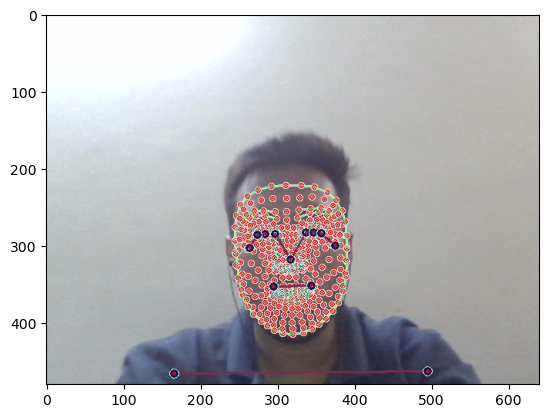

In [113]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))